In [29]:
## install libraries
!pip install -r requirements.txt
!pip install --upgrade jupyter ipywidgets

In [19]:
## imports
#from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

In [ ]:
### DOWNLOAD DATA FROM HUGGING FACE

# """

# Source: https://huggingface.co/datasets/jlohding/sp500-edgar-10k

# """


# # Load the dataset
# ds = load_dataset("jlohding/sp500-edgar-10k")

# # Check the available splits (likely 'train')
# print(ds)

# # Convert the 'train' split to a pandas DataFrame
# df = ds['train'].to_pandas()

# # Save to CSV
# df.to_csv("sp500_edgar_10k.csv", index=False)

# df.head(5)

In [ ]:
"""
- Found some errors in the data: The corpus is missing Alphabet's (GOOGLE) filings because it didn't account for the ticker/cik change. 
- We use Loukas et. al's EDGAR Crawler tool to re-incorporate these documnents into our corpus

"""
#!python edgar-crawler/download_filings.py
!python edgar-crawler/extract_items.py

Starting the structured JSON extraction from 7 unstructured EDGAR filings.
100%|█████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]

Item extraction is completed successfully.
7 files were processed.
Extracted filings are saved to: /Users/kikibayen/Documents/school/CAPSTONE/CODE/edgar-crawler/datasets/EXTRACTED_FILINGS


In [31]:
# Read in records and append to final dataframe

# path to file (based on filing date not reporting year)
file_paths = [
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2009_0001193125-10-030774.json",
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2010_0001193125-11-032930.json",
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2011_0001193125-12-025336.json",
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2012_0001193125-13-028362.json",
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2013_0001288776-14-000020.json",
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2014_0001288776-15-000008.json",
    "edgar-crawler/datasets/EXTRACTED_FILINGS/10-K/1288776_10K_2015_0001652044-16-000012.json"
]

# list to store individual DataFrames
dataframes = []

# loop through all file paths
for file_path in file_paths:
    with open(file_path, "r") as f:
        record = json.load(f)
    
    # convert to one-row DataFrame and append to list
    df = pd.DataFrame([record])
    dataframes.append(df)

# concatenate all DataFrames
missing_google = pd.concat(dataframes, axis=0, ignore_index=True)

# clean up the data
missing_google.rename(columns={"filing_date": 'date'}, inplace=True)
missing_google['cik'] = 1652044
missing_google['secondary_cik'] = 1288776 #move old CIK to the secondary one -- keep cik as main key

desired_cols = ['cik', 'sic', 'secondary_cik', 'company', 'date', 'item_1', 'item_1A', 'item_1B', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_7A', 'item_8', 'item_9', 'item_9A', 'item_9B', 'item_10', 'item_11', 'item_12', 'item_13', 'item_14', 'item_15']

missing_google_clean = missing_google[desired_cols]

missing_google_clean

/Users/kikibayen/Documents/school/CAPSTONE/CODE/.venv/lib/python3.11/site-packages/IPython/core/formatters.py:406: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
/Users/kikibayen/Documents/school/CAPSTONE/CODE/.venv/lib/python3.11/site-packages/IPython/core/formatters.py:406: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,cik,sic,secondary_cik,company,date,item_1,item_1A,item_1B,item_2,item_3,...,item_8,item_9,item_9A,item_9B,item_10,item_11,item_12,item_13,item_14,item_15
0,1652044,7370,1288776,Google Inc.,2010-02-12,ITEM 1. BUSINESS\nOverview\nGoogle is a global...,ITEM 1A. RISK FACTORS\nRisks Related to Our Bu...,ITEM 1B. UNRESOLVED STAFF COMMENTS\nNot applic...,ITEM 2. PROPERTIES\nWe lease approximately 1.6...,"ITEM 3. LEGAL PROCEEDINGS\nFrom time to time, ...",...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9. CHANGES IN AND DISAGREEMENTS WITH ACCO...,ITEM 9A. CONTROLS AND PROCEDURES\n(a) Evaluati...,ITEM 9B. OTHER INFORMATION\nNot applicable.\nP...,"ITEM 10. DIRECTORS, EXECUTIVE OFFICERS AND COR...",ITEM 11. EXECUTIVE COMPENSATION\nThe informati...,ITEM 12. SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM 13. CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM 14. PRINCIPAL ACCOUNTING FEES AND SERVICE...,"ITEM 15. EXHIBITS, FINANCIAL STATEMENT SCHEDUL..."
1,1652044,7370,1288776,Google Inc.,2011-02-11,ITEM 1. BUSINESS\nOverview\nGoogle is a global...,ITEM 1A. RISK FACTORS\nOur operations and fina...,ITEM 1B. UNRESOLVED STAFF COMMENTS\nNone.,ITEM 2. PROPERTIES\nWe own buildings and land ...,ITEM 3. LEGAL PROCEEDINGS\nFor a description o...,...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9. CHANGES IN AND DISAGREEMENTS WITH ACCO...,ITEM 9A. CONTROLS AND PROCEDURES\nEvaluation o...,ITEM 9B. OTHER INFORMATION\nNone.\nPART III,"ITEM 10. DIRECTORS, EXECUTIVE OFFICERS AND COR...",ITEM 11. EXECUTIVE COMPENSATION\nThe informati...,ITEM 12. SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM 13. CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM 14. PRINCIPAL ACCOUNTING FEES AND SERVICE...,"ITEM 15. EXHIBITS, FINANCIAL STATEMENT SCHEDUL..."
2,1652044,7370,1288776,Google Inc.,2012-01-26,ITEM 1. BUSINESS\nOverview\nGoogle is a global...,ITEM 1A. RISK FACTORS\nOur operations and fina...,ITEM 1B. UNRESOLVED STAFF COMMENTS\nNone.,ITEM 2. PROPERTIES\nOur headquarters are locat...,ITEM 3. LEGAL PROCEEDINGS\nFor a description o...,...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9. CHANGES IN AND DISAGREEMENTS WITH ACCO...,ITEM 9A. CONTROLS AND PROCEDURES\nEvaluation o...,ITEM 9B. OTHER INFORMATION\nNone.\nPART III,"ITEM 10. DIRECTORS, EXECUTIVE OFFICERS AND COR...",ITEM 11. EXECUTIVE COMPENSATION\nThe informati...,ITEM 12. SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM 13. CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM 14. PRINCIPAL ACCOUNTING FEES AND SERVICE...,"ITEM 15. EXHIBITS, FINANCIAL STATEMENT SCHEDUL..."
3,1652044,7370,1288776,Google Inc.,2013-01-29,ITEM 1. BUSINESS\nOverview\nGoogle is a global...,ITEM 1A. RISK FACTORS\nOur operations and fina...,ITEM 1B. UNRESOLVED STAFF COMMENTS\nNone.,ITEM 2. PROPERTIES\nOur headquarters are locat...,ITEM 3. LEGAL PROCEEDINGS\nFor a description o...,...,ITEM 8. FINANCIAL STATEMENTS AND SUPPLEMENTARY...,ITEM 9. CHANGES IN AND DISAGREEMENTS WITH ACCO...,ITEM 9A. CONTROLS AND PROCEDURES\nEvaluation o...,ITEM 9B. OTHER INFORMATION\nNone.\nPART III,"ITEM 10. DIRECTORS, EXECUTIVE OFFICERS AND COR...",ITEM 11. EXECUTIVE COMPENSATION\nThe informati...,ITEM 12. SECURITY OWNERSHIP OF CERTAIN BENEFIC...,ITEM 13. CERTAIN RELATIONSHIPS AND RELATED TRA...,ITEM 14. PRINCIPAL ACCOUNTING FEES AND SERVICE...,"ITEM 15. EXHIBITS, FINANCIAL STATEMENT SCHEDUL..."
4,1652044,7370,1288776,Google Inc.,2014-02-12,ITEM 1.\nBUSINESS\nOverview\nGoogle is a globa...,ITEM 1A.\nRISK FACTORS\nOur operations and fin...,ITEM 1B.\nUNRESOLVED STAFF COMMENTS\nOn April ...,ITEM 2.\nPROPERTIES\nOur headquarters are loca...,ITEM 3.\nLEGAL PROCEEDINGS\nFor a description ...,...,ITEM 8.\nFINANCIAL STATEMENTS AND SUPPLEMENTAR...,ITEM 9.\nCHANGES IN AND DISAGREEMENTS WITH ACC...,ITEM 9A.\nCONTROLS AND PROCEDURES\nEvaluation ...,ITEM 9B.\nOTHER INFORMATION\nNone.\nPART III,"ITEM 10.\nDIRECTORS, EXECUTIVE OFFICERS AND CO...",ITEM 11.\nEXECUTIVE COMPENSATION\nThe informat...,ITEM 12.\nSECURITY OWNERSHIP OF CERTAIN BENEFI...,ITEM 13.\nCERTAIN RELA

In [36]:
# only keep companies that filed in all years [2010 - 2022]

drop_cols = ['ret', '1_day_return', '3_day_return', '5_day_return', '10_day_return', '20_day_return', '40_day_return', '60_day_return', '80_day_return', '100_day_return', '150_day_return', '252_day_return', '__index_level_0__']

full_data = pd.read_csv("sp500_edgar_10k.csv")

#drop extra columns
full_data.drop(columns=drop_cols, inplace=True)

#add secondary sic 
full_data['secondary_cik'] = ""

#add missing google rows
full_data = pd.concat([full_data, missing_google], axis='rows').reset_index(drop=True)

#convert
full_data['date'] = pd.to_datetime(full_data['date'])

full_data = full_data[desired_cols]

full_data['year'] = full_data['date'].dt.year #extract year

#don't want any filings before 2010
full_data = full_data[full_data['year'] >= 2010].copy()

target_years = list(range(2010, 2023))  # 2010 to 2022 inclusive

company_years = full_data.groupby("cik")["year"].unique() #list of unique filing years

#full list of years should be a subset of the total list of years for each company
companies_with_all_years = company_years[company_years.apply(lambda years: set(target_years).issubset(set(years)))].index

df = full_data[full_data["cik"].isin(companies_with_all_years)] #filter for desired ciks

df.to_csv("sp500_edgar_10k_filtered.csv", index=False) #write to file

In [37]:
#df = pd.read_csv("sp500_edgar_10k_filtered.csv")

#number of unique documents
print(f"Total Documents in Desired Date Range: {len(df)}")

#unique number of companies
print(f"Unique Companies in Dataset: {df['cik'].nunique()}")


Total Documents in Desired Date Range: 3719
Unique Companies in Dataset: 286


In [ ]:
"""

- Want to see how many times privacy is mentioned in each document (normalize by privacy mentions ever 1000 words)
- Take the average of all documents FOR EACH year in our time scale
- Allows us to get a baseline understanding of the usage of the word privacy over time

"""

# Identify all columns that start with "item_"
item_cols = [col for col in df.columns if col.startswith("item_")]

# Concatenate those columns row-wise with a space between them
df["text"] = df[item_cols].astype(str).agg(" ".join, axis=1)

#count the number of times privacy appears in our text
def count_mentions(text, keyword="privacy"):
    return text.lower().count(keyword)

#how many sets of 1000 words are there in each document?
def words_per_1000(text):
    return len(text.split()) / 1000

# Add columns to your dataframe
df["privacy_mentions"] = df["text"].apply(count_mentions)
df["words_per_1000"] = df["text"].apply(words_per_1000)
df["mentions_per_1000_words"] = df["privacy_mentions"] / df["words_per_1000"]

grouped = df.groupby("year")["mentions_per_1000_words"].agg(["mean", "std"]).reset_index() #group by year to the get the average and standard deviation

/var/folders/r2/26wqb6z90xv49kpn_4dbtnfw0000gn/T/ipykernel_7155/2589821503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df[item_cols].astype(str).agg(" ".join, axis=1)
/var/folders/r2/26wqb6z90xv49kpn_4dbtnfw0000gn/T/ipykernel_7155/2589821503.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["privacy_mentions"] = df["text"].apply(count_mentions)
/var/folders/r2/26wqb6z90xv49kpn_4dbtnfw0000gn/T/ipykernel_7155/2589821503.py:25: SettingWithCopyWarning: 
A value is trying to be set on

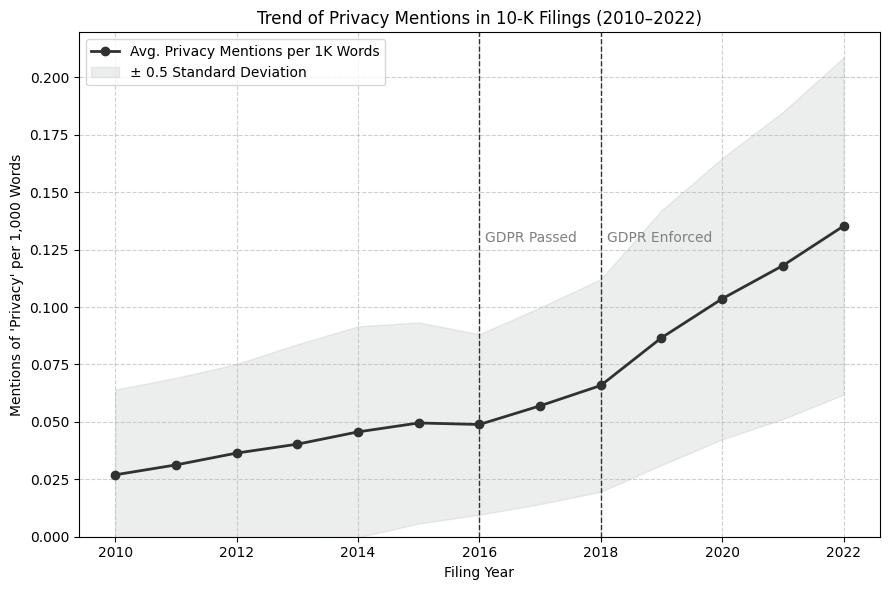

In [ ]:
"""

- plot the annual average and st. dev with a 0.5 std band on each side. 
- used generatve AI to help plot results and format matplotlib

"""
# ------------------------------
# STEP 3: Plot with shaded standard deviation band
# ------------------------------

plt.figure(figsize=(9, 6))

# Line for mean
plt.plot(grouped["year"], grouped["mean"], label="Avg. Privacy Mentions per 1K Words", color="#303232", linewidth=2, marker='o')

# Shaded area for ±1 std dev
plt.fill_between(grouped["year"],
                 grouped["mean"] - 0.5 * grouped["std"],
                 grouped["mean"] + 0.5 * grouped["std"],
                 color="#a2a9a8", alpha=0.2, label="± 0.5 Standard Deviation")

# Optional: vertical line for GDPR
plt.axvline(x=2018, color="#303232", linestyle="--", linewidth=1)
plt.text(2018.1, grouped["mean"].max()*0.95, "GDPR Enforced", color="grey")

plt.axvline(x=2016, color="#303232", linestyle="--", linewidth=1)
plt.text(2016.1, grouped["mean"].max()*0.95, "GDPR Passed", color="grey")

# Formatting
plt.title("Trend of Privacy Mentions in 10-K Filings (2010–2022)")
plt.xlabel("Filing Year")
plt.ylim(bottom=0)
plt.ylabel("Mentions of 'Privacy' per 1,000 Words")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig('FIGS/word_frequency.png', dpi=300)



In [ ]:
"""

- Keeping all sections of text would be redundant; reduce the sections of the each document we analyze to where privacy appears the most
- Get ~99% coverage of "privacy" usage in these documents by picking sections that encompass AT LEAST 1% of the usage of the word privacy in the corpus

"""

df = pd.read_csv('/Users/kikibayen/Documents/school/CAPSTONE/CODE/sp500_edgar_10k_filtered.csv')

# count privacy mentions
privacy_counts = {}
for col in df.columns:
    if col.startswith('item_'):  # get all sections
        total_mentions = 0
        for text in df[col].dropna(): # skip empty sections, loop through each item in col (text chunks)
            if isinstance(text, str): # double check section is a text column
                total_mentions += text.lower().count('privacy') #count the number of times privacy appears
        
        privacy_counts[col] = total_mentions #save the total number of mentions per column in a dictionary

# Sort by frequency
sorted_counts = sorted(privacy_counts.items(), key=lambda x: x[1], reverse=True)

print("Privacy mentions by section:")
for item, count in sorted_counts:
    if count > 0:  # only show sections with privacy mentions
        print(f"{item}: {count} mentions")

# Calculate percentages
total_mentions = sum(privacy_counts.values())
print(f"\nTotal privacy mentions: {total_mentions}")

for item, count in sorted_counts:
    if count > 0:
        percentage = (count / total_mentions) * 100
        print(f"{item}: {percentage:.1f}% of all mentions")

Privacy mentions by section:
item_1A: 8272 mentions
item_1: 3004 mentions
item_7: 394 mentions
item_15: 239 mentions
item_8: 118 mentions
item_3: 26 mentions
item_4: 18 mentions
item_10: 14 mentions
item_2: 11 mentions
item_12: 2 mentions
item_6: 1 mentions

Total privacy mentions: 12099
item_1A: 68.4% of all mentions
item_1: 24.8% of all mentions
item_7: 3.3% of all mentions
item_15: 2.0% of all mentions
item_8: 1.0% of all mentions
item_3: 0.2% of all mentions
item_4: 0.1% of all mentions
item_10: 0.1% of all mentions
item_2: 0.1% of all mentions
item_12: 0.0% of all mentions
item_6: 0.0% of all mentions


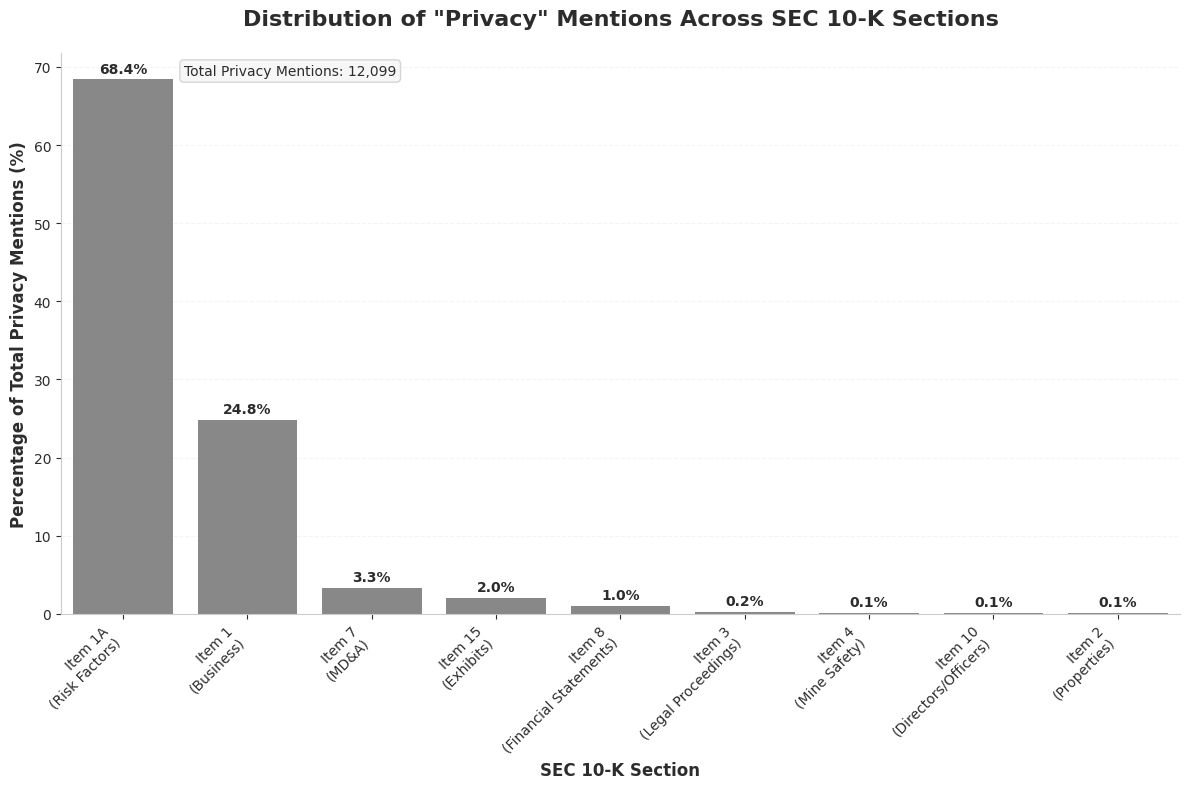

In [ ]:

"""

- visualize these results below
- used generative AI to help create the visualization and matplotlib formatting

"""


# percentage data
data = {
    'item_1A': 68.4,
    'item_1': 24.8,
    'item_7': 3.3,
    'item_15': 2.0,
    'item_8': 1.0,
    'item_3': 0.2,
    'item_4': 0.1,
    'item_10': 0.1,
    'item_2': 0.1,
    'item_12': 0.0,
    'item_6': 0.0
}

# create dataframe to plot
df = pd.DataFrame(list(data.items()), columns=['Item', 'Percentage'])
df = df[df['Percentage'] > 0]  # remove no mentions

# create official label for items
item_descriptions = {
    'item_1A': 'Item 1A\n(Risk Factors)',
    'item_1': 'Item 1\n(Business)',
    'item_7': 'Item 7\n(MD&A)',
    'item_15': 'Item 15\n(Exhibits)',
    'item_8': 'Item 8\n(Financial Statements)',
    'item_3': 'Item 3\n(Legal Proceedings)',
    'item_4': 'Item 4\n(Mine Safety)',
    'item_10': 'Item 10\n(Directors/Officers)',
    'item_2': 'Item 2\n(Properties)'
}

df['Item_Label'] = df['Item'].map(item_descriptions) #map items back to official title

#### PLOT

# Set up the plot style
plt.style.use('default')

# Create the figure with gray theme
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')

# Create bar chart with demure gray palette
bars = sns.barplot(data=df, x='Item_Label', y='Percentage', ax=ax, 
                   color='#6B6B6B', alpha=0.8)

# Customize the plot
ax.set_title('Distribution of "Privacy" Mentions Across SEC 10-K Sections', 
             fontsize=16, fontweight='bold', pad=20, color='#2C2C2C')
ax.set_xlabel('SEC 10-K Section', fontsize=12, fontweight='bold', color='#2C2C2C')
ax.set_ylabel('Percentage of Total Privacy Mentions (%)', fontsize=12, fontweight='bold', color='#2C2C2C')

# Style the axes
ax.tick_params(colors='#2C2C2C', which='both')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', color='#2C2C2C')

# Add a note about total mentions
ax.text(0.11, 0.98, 'Total Privacy Mentions: 12,099', transform=ax.transAxes, 
        fontsize=10, verticalalignment='top', color='#2C2C2C',
        bbox=dict(boxstyle='round', facecolor='#F5F5F5', alpha=0.8, edgecolor='#CCCCCC'))

# Improve layout
plt.tight_layout()

# Add grid for better readability
ax.grid(axis='y', alpha=0.2, linestyle='--', color='#CCCCCC')
ax.set_axisbelow(True)

plt.show()

plt.savefig('FIGS/section_distribution.png', dpi=300)



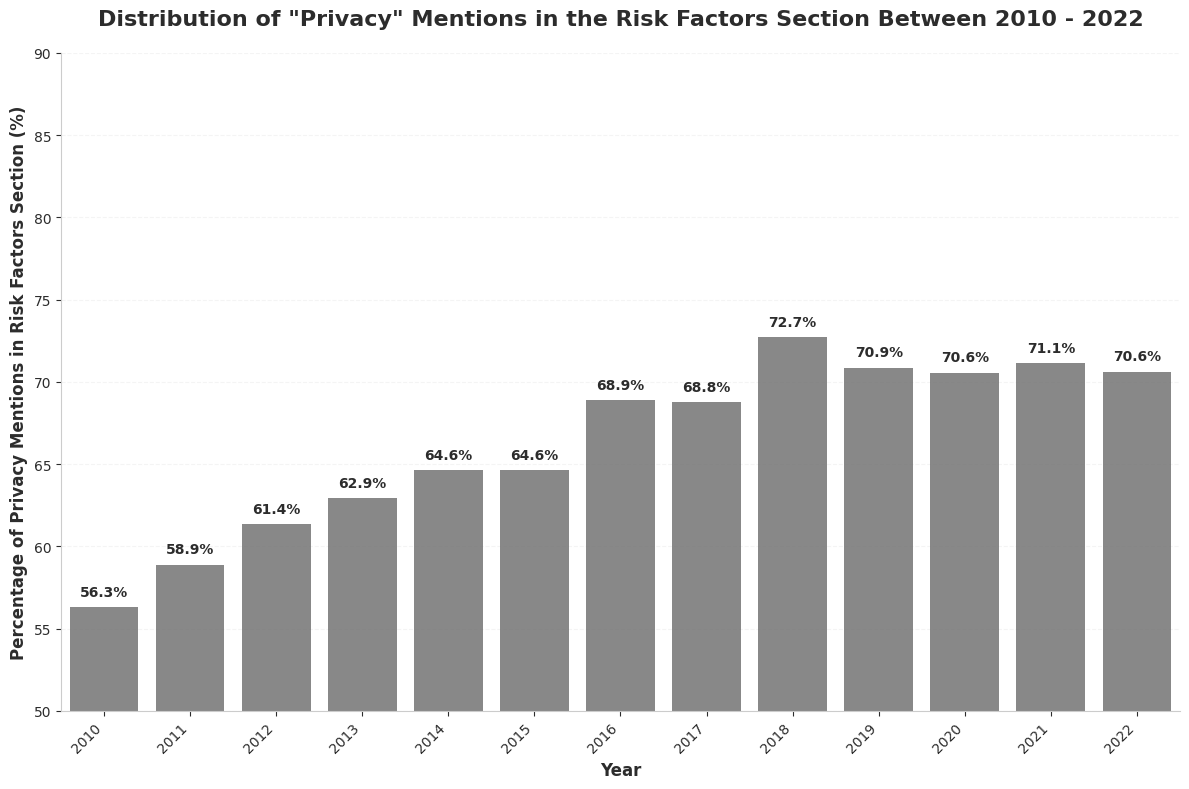

In [ ]:
"""

- Clearly the Risk Factors section dominates the number of "privacy" mentions, but does this change overtime??
- What is the percentage of privacy mentions in Item 1A each year

"""

def count_word_mentions(df, year, keyword):
    
    counts = {}
    
    # count keyword mentions
    for col in df.columns:
        if col.startswith('item_'):  # get all sections
            total_mentions = 0
            for text in df[col].dropna(): # skip empty sections, loop through each item in col (text chunks)
                if isinstance(text, str): # double check section is a text column
                    total_mentions += text.lower().count(keyword) #count the number of times privacy appears
            
            counts[col] = total_mentions #save the total number of mentions per column in a dictionary

    
    total_mentions = sum(counts.values())

    risk_factor_perc = (counts['item_1A']/total_mentions) * 100 

    return {'year': year, 'risk_factor_perc': risk_factor_perc}


#df = pd.read_csv('/Users/kikibayen/Documents/school/CAPSTONE/CODE/sp500_edgar_10k_filtered.csv')

years = range(2010, 2023)

final_counts = pd.DataFrame(columns=['year', 'risk_factor_perc'])

for year in years:

    year_df = df[df['year'] == year]

    new_row = count_word_mentions(year_df, year, 'privacy')

    final_counts = pd.concat([final_counts, pd.DataFrame([new_row])], ignore_index=True)

#final_counts.head(n=13)


### PLOT

# Set up the plot style
plt.style.use('default')

# Create the figure with gray theme
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('white')

# Create bar chart with demure gray palette
bars = sns.barplot(data=final_counts, x='year', y='risk_factor_perc', ax=ax, 
                   color='#6B6B6B', alpha=0.8)

#set axis min/max
plt.ylim(50, 90)

# Customize the plot
ax.set_title('Distribution of "Privacy" Mentions in the Risk Factors Section Between 2010 - 2022', 
             fontsize=16, fontweight='bold', pad=20, color='#2C2C2C')
ax.set_xlabel('Year', fontsize=12, fontweight='bold', color='#2C2C2C')
ax.set_ylabel('Percentage of Privacy Mentions in Risk Factors Section (%)', fontsize=12, fontweight='bold', color='#2C2C2C')

# Style the axes
ax.tick_params(colors='#2C2C2C', which='both')
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_color('#CCCCCC')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', color='#2C2C2C')

# Improve layout
plt.tight_layout()

# Add grid for better readability
ax.grid(axis='y', alpha=0.2, linestyle='--', color='#CCCCCC')
ax.set_axisbelow(True)

plt.show()

plt.savefig('FIGS/risk_factor_distribution.png', dpi=300)


In [ ]:
"""

- Most of the privacy mentions are concentrated in a few sections, so vectorizing the entire document is time inefficient
- Limit to sections that contain 99% of the privacy mentions in the documents

"""


#filter the df so that we have only the columns we're interested in.
full_df = pd.read_csv("sp500_edgar_10k_filtered.csv")

columns_to_keep = ['year', 'cik', 'sic', 'secondary_cik', 'company', 'date','item_1A', 'item_1', 'item_7', 'item_15', 'item_8']

# Filter the dataframe
filtered_df = full_df[columns_to_keep]

filtered_df.to_csv("sp500_edgar_10k_columns_filtered.csv")

In [14]:
full_df.to_csv("sp500_edgar_10k_filtered.csv")

In [ ]:
unique_companies = pd.read_csv("sp500_edgar_10k_columns_filtered.csv")['company'].unique()

In [6]:
pd.Series(unique_companies).to_csv('companies.csv', header=['company'])

In [ ]:
'''

- Find examples of Positive/Risk words in corpus for term selection cross-validation

- Searches across the sections of interested (for positive framing we exempt Risk Factors - Item 1A to save time)

- Aides to quickly surface terms of interested rather than having to read 3000+ documents

'''

df = pd.read_csv('sp500_edgar_10k_columns_filtered.csv')

def search_privacy_proximity_with_text(df, target_word, window=10):
    """
    
    - Big 'constructor function' to search for target_word near 'privacy' and return the surrounding text chunk
    - target_word refers to the positive/risk word for cosine similarity analysis
    - window looks for the target within N words before or after "privacy." Default is 10.
    - RETURNS: a dataframe of the company cik, the year of the filing, and the text chunk
    
    """
    
    def get_privacy_chunks(text, target_word, window=10):
        """
         
         - Return text chunks where target_word appears near privacy
         - Allows us to keep track of the chunks of text that contain both privacy and the target word
         - RETURNS just the text chunks
        
        """
        
        # if 
        if pd.isna(text):
            return []
        
        words = text.lower().split() #convert all words to a list
        privacy_positions = [i for i, word in enumerate(words) if 'privacy' in word] #find all the indicies of the word privacy
        
        chunks = []
        for pos in privacy_positions: #iterate through the privacy indices
            start = max(0, pos - window)
            end = min(len(words), pos + window + 1)
            window_words = words[start:end] #split each text chunk into N word windows
            
            if target_word in window_words: #check if the target word is in my window
                chunk = ' '.join(words[start:end]) #if yes, reconstruct the sentence
                chunks.append(chunk) #save
        
        return chunks
    
    text_columns = ['item_1', 'item_7', 'item_15', 'item_8'] #excluding item 1A for efficiency in positive words
    results = []
    
    for col in text_columns:
        for idx, row in df.iterrows():
            chunks = get_privacy_chunks(row[col], target_word, window) #get the text chunks from each of the 3000 filings in my corpus
            
            if chunks:  # if there are matches
                for chunk in chunks: #put them in a dataframe with corresponding filing information
                    results.append({
                        'cik': row['cik'],
                        'year': row['year'],
                        'found_in_column': col,
                        'text_chunk': chunk
                    })
    
    return pd.DataFrame(results) #return results as a dataframe

Found 23 text chunks with 'privacy' and 'control'
      cik  year found_in_column  \
0    4962  2012          item_1   
1  813828  2017          item_1   
2  813828  2018          item_1   
3    5272  2019          item_1   
4  813828  2019          item_1   

                                          text_chunk  
0  examiners are increasingly focused on ensuring...  
1  Company’s ability to control and distribute it...  
2  Company’s ability to control and distribute it...  
3  on certain changes in control of regulated (re...  
4  Company’s ability to control and distribute it...  


In [ ]:
# POSITIVE WORDS:
trust_matches = search_privacy_proximity_with_text(df, 'trust', window=8)
respect_matches = search_privacy_proximity_with_text(df, 'respect', window=8)
invest_matches = search_privacy_proximity_with_text(df, 'invest', window=8)
uphold_matches = search_privacy_proximity_with_text(df, 'uphold', window=8)
protect_matches = search_privacy_proximity_with_text(df, 'protect', window=8)
empower_matches = search_privacy_proximity_with_text(df, 'empower', window=8)


       cik  year found_in_column  \
0  1136893  2015          item_1   
1  1136893  2016          item_1   
2  1136893  2017          item_1   
3  1136893  2018          item_1   
4  1136893  2019          item_1   

                                          text_chunk  
0  Regulation AA (Unfair or Deceptive Acts or Pra...  
1  Regulation AA (Unfair or Deceptive Acts or Pra...  
2  Regulation AA (Unfair or Deceptive Acts or Pra...  
3  or Deceptive Acts or Practices), data protecti...  
4  or Deceptive Acts or Practices), data protecti...  


In [ ]:
# RISK WORDS:
reputation_matches = search_privacy_proximity_with_text(df, 'reputation', window=8)
harm_matches = search_privacy_proximity_with_text(df, 'harm', window=8)
liability_matches = search_privacy_proximity_with_text(df, 'liability', window=8)
obligation_matches = search_privacy_proximity_with_text(df, 'obligation', window=8)
litigation_matches = search_privacy_proximity_with_text(df, 'litigation', window=8)
legislation_matches = search_privacy_proximity_with_text(df, 'legislation', window=8)